In [ ]:
from libs.ltspice_helper import convert_ltspice_step_simulation_data_to_csv

dataset_filename = "simulations_ltspice/2_optimizing_components_dataset.csv"
datasets = [
    {"file": "simulations_ltspice/2_optimizing_components.txt"},
]

convert_ltspice_step_simulation_data_to_csv(
    datasets=datasets, output_filename=dataset_filename)


In [4]:
import pandas as pd
import numpy as np

dataset_filename = "simulations_ltspice/2_optimizing_components_dataset.csv"
df = pd.read_csv(dataset_filename, low_memory=True, on_bad_lines='warn')
df = df.apply(pd.to_numeric, errors='coerce')
df = df.replace(np.nan, 0)

df = df[['Fsw', 'L', 'Ro', 'V(eff)', 'V(pin)', 'V(pout)', 'V(pmos)', 'V(pdiode)', 'V(pcc)', 'V(pci)', 'V(pco)', 'V(pli)', 'V(plo)']]
df = df.groupby(['Fsw', 'L', 'Ro']).mean()

df.to_csv("simulations_ltspice/2_optimizing_components_dataset_mean.csv")
del df


b'Skipping line 24907436: expected 52 fields, saw 63\n'


In [5]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import cm
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("simulations_ltspice/2_optimizing_components_dataset_mean.csv")
df

,Fsw,L,Ro,V(eff),V(pin),V(pout),V(pmos),V(pdiode),V(pcc),V(pci),V(pco),V(pli),V(plo)
0,40000.0,0.000033,0.5,0.861997,202.700976,174.783362,6.324351,15.317496,7.264767,1.787682,-4.558441,0.512480,4.125875
1,40000.0,0.000033,1.0,0.906199,204.408468,185.265779,3.986514,11.039770,8.532971,2.236382,-5.652639,0.880544,2.098789
2,40000.0,0.000033,4.0,0.945903,202.357398,191.462812,2.432876,5.514119,11.171953,3.421814,-8.550645,1.964879,1.441847
3,40000.0,0.000033,20.0,0.957922,195.650644,187.270976,2.181147,2.345311,17.849734,4.897298,-12.359719,1.614473,1.310715
4,40000.0,0.000033,30.0,0.954800,193.729689,184.760351,2.157858,1.931275,18.730609,4.883557,-11.598017,0.942026,1.322756
5,40000.0,0.000033,100.0,0.937296,183.612568,171.869473,2.083894,1.344064,25.606974,5.485970,-14.656133,0.720654,1.528379
6,100000.0,0.000022,1.0,0.890281,204.242357,181.897251,5.813967,12.395654,8.726514,2.413176,-5.202330,0.794712,1.743527
7,100000.0,0.000022,4.0,0.931867,201.514107,187.829823,4.046517,6.843673,11.172037,2.693803,-7.382739,0.863322,0.515025
8,100000.0,0.000022,20.0,0.939324,195.470308,183.640786,4.627117,3.633825,21.725945,3.809369,-15.563853,0.755873,0.147770
9,100000.0,0.000022,30.0,0.935111,193.164486,180.646936,5.113976,3.109338,24.857670,3.872321,-17.802843,0.664220,0.106802


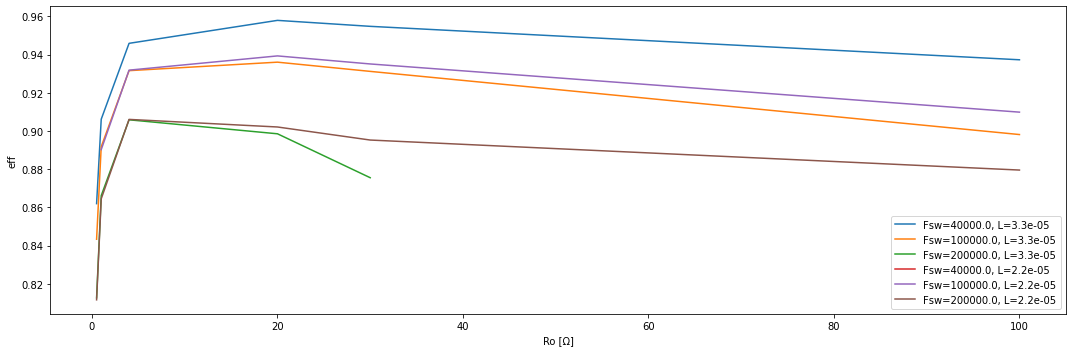

In [100]:
rows_key = 'L'
cols_key = 'Fsw'

rows_val = df[rows_key].unique().tolist()
cols_val = df[cols_key].unique().tolist()

x_key = 'Ro'
y_key = 'V(eff)'

plt.figure(figsize=(15, 5))

for r in range(len(rows_val)):
    df_row = df.loc[df[rows_key] == rows_val[r]]
    for col_val in cols_val:
        df_col = df_row.loc[df_row[cols_key] == col_val]
        plt.plot(df_col[x_key], df_col[y_key], label=f'{cols_key}={col_val}, {rows_key}={rows_val[r]}')

plt.legend()
plt.xlabel(f'{x_key} [Ω]')
plt.ylabel('eff')
plt.tight_layout()
plt.show()